<a href="https://colab.research.google.com/github/VibroGuard/Visualize-Data/blob/main/Visualize-Basics/Visualize_Vibration_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualize Vibration Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pre_process_data(data):
    """
    [x,y,z], [x,y,z], [x,y,z] to [x,x,x] [y,y,y] [z,z,z] format
    This function processes the data and returns the x, y, z values of the data
    :param data:
    :return: for given data set it returns x, y, z values separately
    """
    x_ = data[:, 0]
    y_ = data[:, 1]
    z_ = data[:, 2]
    return x_, y_, z_

In [3]:
def fft_data(data):
    """
    This function takes the data and returns the fft of the data
    :param data:
    :return: fft of the data (x+iy) and absolute value of the fft (magnitude of the fft)
    """
    fft_result = np.fft.fft(data)
    return fft_result.tolist(), np.abs(fft_result).tolist()

In [4]:
def visualize_data(x, y, z, sps):
    """
    This function visualizes the data in x, y, z directions with respect to time
    :param x:
    :param y:
    :param z:
    :param sps samples per second:
    :return: plots the data
    """
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    names = ["x - direction", "y - direction", "z - direction"]
    for i, ax in enumerate(axs):
        data = [x, y, z][i]
        time = len(data) / sps  # time = number of samples / samples per second
        t_axis = np.linspace(1, time, len(data))  # time counts form 1 to the end
        ax.plot(t_axis, data)

        ax.set_title(names[i])
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Value')

    plt.tight_layout()
    plt.show()

In [5]:
# Sample data sets
data_sets = [[1, 2, 3], [4, 5, 6], [7, 10, 3], [1, 5, 9]]  # put data set here
data_sets = np.array(data_sets)

[1 4 7 1] [ 2  5 10  5] [3 6 3 9]
[13.0, 6.708203932499369, 3.0, 6.708203932499369]
[22.0, 8.0, 2.0, 8.0]
[21.0, 3.0, 9.0, 3.0]


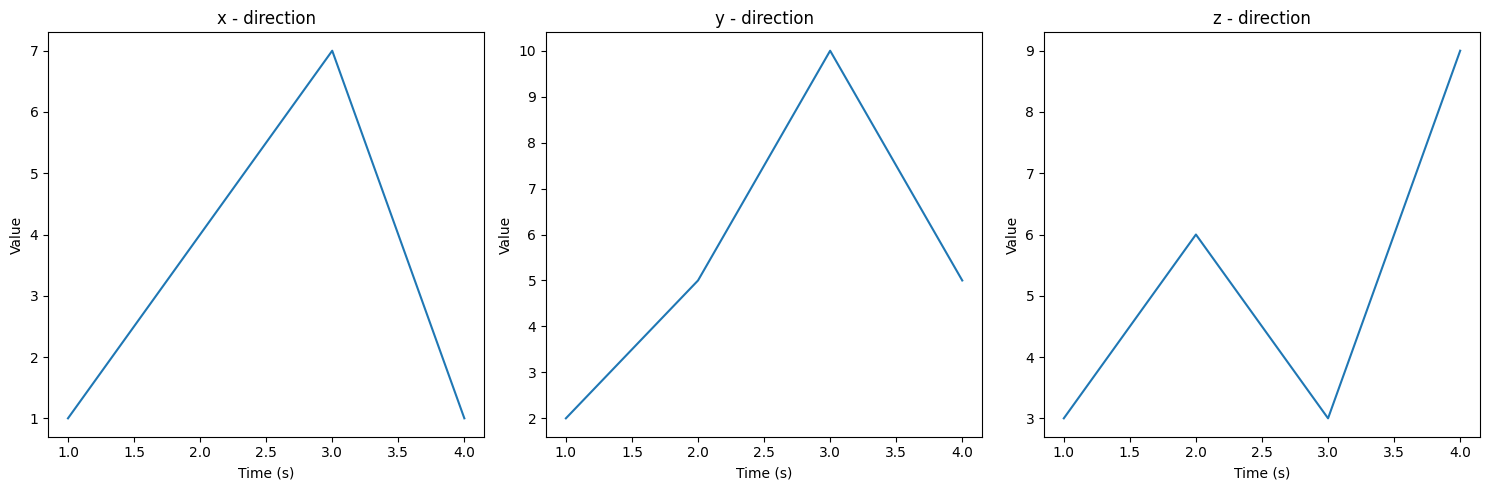

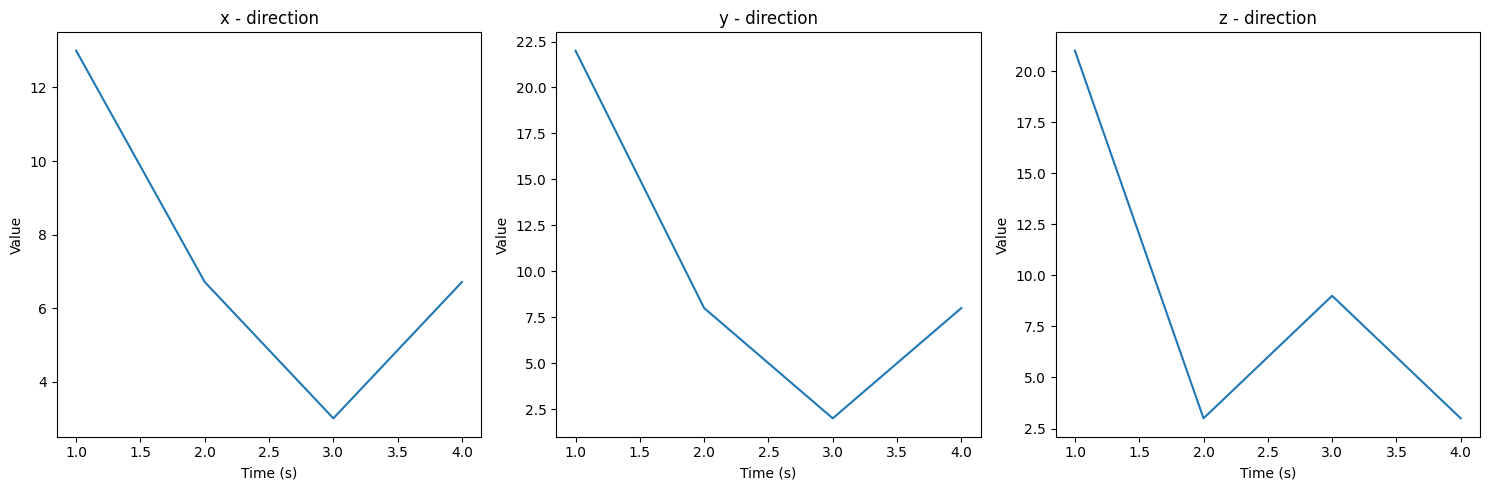

In [6]:
x, y, z = pre_process_data(data_sets)
print(x, y, z)

fft_ij_x, fft_mag_x = fft_data(x)
fft_ij_y, fft_mag_y = fft_data(y)
fft_ij_z, fft_mag_z = fft_data(z)
print(fft_mag_x)
print(fft_mag_y)
print(fft_mag_z)

visualize_data(x, y, z, 1)

visualize_data(fft_mag_x, fft_mag_y, fft_mag_z, 1)